In [1]:
import warnings
warnings.filterwarnings("ignore")
import itertools
import pandas as pd

In [2]:
print(pd.__version__)

0.22.0


In [3]:
pd.__version__[0:3]

'0.2'

In [4]:
if float(pd.__version__[0:3])>=0.2:
    #first pip install pandas_datareader
    import pandas_datareader.data as web
else:
    import pandas.io.data as web
    
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
%matplotlib inline

from fbprophet import Prophet
from datetime import datetime

from matplotlib import font_manager,rc
path = "./NanumSquareBold.ttf"
font_name = font_manager.FontProperties(fname=path).get_name()
rc('font',family=font_name)

plt.rcParams['axes.unicode_minus']=False

In [5]:
start = datetime(1990, 1, 1)
end = datetime(2017, 6, 30)

AAPL = web.DataReader('AAPL','yahoo',start,end)
AAPL.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
1990-01-02,1.258929,1.339286,1.250000,1.330357,0.123377,45799600
1990-01-03,1.357143,1.357143,1.339286,1.339286,0.124205,51998800
1990-01-04,1.366071,1.383929,1.330357,1.343750,0.124620,55378400
1990-01-05,1.348214,1.366071,1.321429,1.348214,0.125034,30828000
1990-01-08,1.339286,1.357143,1.321429,1.357143,0.125862,25393200


In [6]:
AAPL_trunc = AAPL[:'2016-12-31']
AAPL_trunc

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
1990-01-02,1.258929,1.339286,1.250000,1.330357,0.123377,45799600
1990-01-03,1.357143,1.357143,1.339286,1.339286,0.124205,51998800
1990-01-04,1.366071,1.383929,1.330357,1.343750,0.124620,55378400
1990-01-05,1.348214,1.366071,1.321429,1.348214,0.125034,30828000
1990-01-08,1.339286,1.357143,1.321429,1.357143,0.125862,25393200
1990-01-09,1.357143,1.357143,1.321429,1.343750,0.124620,21534800
1990-01-10,1.343750,1.343750,1.276786,1.285714,0.119237,49929600
1990-01-11,1.294643,1.294643,1.232143,1.232143,0.114269,52763200
1990-01-12,1.223214,1.241071,1.205357,1.232143,0.114269,42974400


In [7]:
df = pd.DataFrame({'ds':AAPL_trunc.index, 'y':AAPL_trunc['Close']})
df.reset_index(inplace=True)
del df['Date']
df.head()

,ds,y
0,1990-01-02,1.330357
1,1990-01-03,1.339286
2,1990-01-04,1.343750
3,1990-01-05,1.348214
4,1990-01-08,1.357143


In [8]:
m = Prophet()
m.fit(df);

INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [9]:
future = m.make_future_dataframe(periods=365)
future.tail()

,ds
7165,2017-12-26
7166,2017-12-27
7167,2017-12-28
7168,2017-12-29
7169,2017-12-30


In [10]:
forecast=m.predict(future)
forecast[['ds','yhat','yhat_lower','yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
7165,2017-12-26,131.876458,123.091518,139.700837
7166,2017-12-27,131.945716,123.043955,141.019867
7167,2017-12-28,131.976293,123.242783,140.865143
7168,2017-12-29,131.958984,123.107352,140.627355
7169,2017-12-30,131.757396,123.725346,140.250490


In [11]:
forecast

,ds,trend,trend_lower,trend_upper,yhat_lower,yhat_upper,additive_terms,additive_terms_lower,additive_terms_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,yhat
0,1990-01-02,1.770318,1.770318,1.770318,-6.028461,9.359133,-0.060809,-0.060809,-0.060809,0.0,0.0,0.0,0.081118,0.081118,0.081118,-0.141928,-0.141928,-0.141928,1.709509
1,1990-01-03,1.769990,1.769990,1.769990,-6.257817,10.788094,-0.019507,-0.019507,-0.019507,0.0,0.0,0.0,0.109345,0.109345,0.109345,-0.128852,-0.128852,-0.128852,1.750483
2,1990-01-04,1.769661,1.769661,1.769661,-6.707936,10.573994,-0.025676,-0.025676,-0.025676,0.0,0.0,0.0,0.094661,0.094661,0.094661,-0.120336,-0.120336,-0.120336,1.743985
3,1990-01-05,1.769332,1.769332,1.769332,-6.833882,9.603349,-0.088428,-0.088428,-0.088428,0.0,0.0,0.0,0.029000,0.029000,0.029000,-0.117429,-0.117429,-0.117429,1.680904
4,1990-01-08,1.768346,1.768346,1.768346,-6.718681,9.834862,-0.018823,-0.018823,-0.018823,0.0,0.0,0.0,0.131448,0.131448,0.131448,-0.150270,-0.150270,-0.150270,1.749523
5,1990-01-09,1.768017,1.768017,1.768017,-6.589242,10.121342,-0.095570,-0.095570,-0.095570,0.0,0.0,0.0,0.081118,0.081118,0.081118,-0.176689,-0.176689,-0.176689,1.672446
6,1990-01-10,1.767688,1.767688,1.767688,-6.574347,10.188043,-0.101737,-0.101737,-0.101737,0.0,0.0,0.0,0.109345,0.109345,0.109345,-0.211081,-0.211081,-0.211081,1.665951
7,1990-01-11,1.767359,1.767359,1.767359,-7.452860,9.528979,-0.158575,-0.158575,-0.158575,0.0,0.0,0.0,0.094661,0.094661,0.094661,-0.253235,-0.253235,-0.253235,1.608785
8,1990-01-12,1.767030,1.767030,1.767030,-6.718743,9.062697,-0.273699,-0.273699,-0.273699,0.0,0.0,0.0,0.029000,0.029000,0.029000,-0.302699,-0.302699,-0.302699,1.493331
9,1990-01-15,1.766044,1.766044,1.766044,-7.652032,9.656272,-0.355717,-0.355717,-0.355717,0.0,0.0,0.0,0.131448,0.131448,0.131448,-0.487165,-0.487165,-0.487165,1.410327


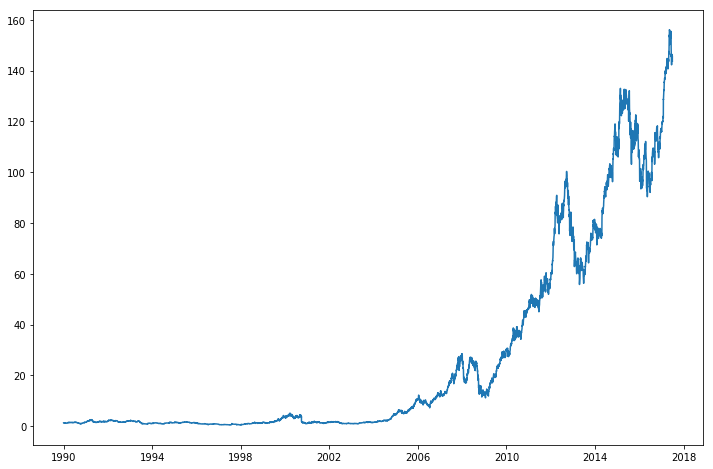

In [12]:
plt.figure(figsize=(12,8))
plt.plot(AAPL['Close'])
plt.show()

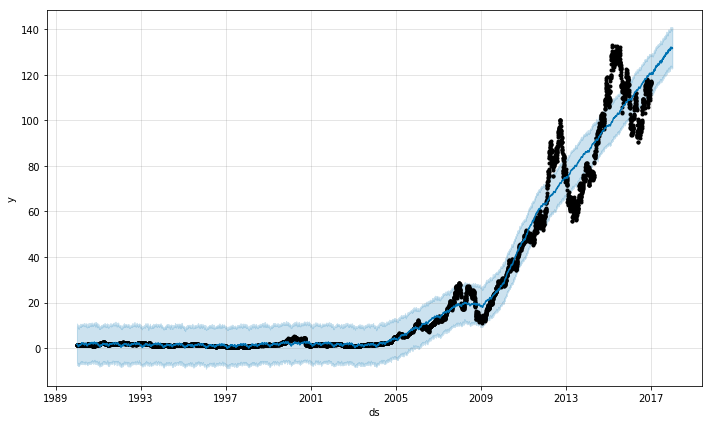

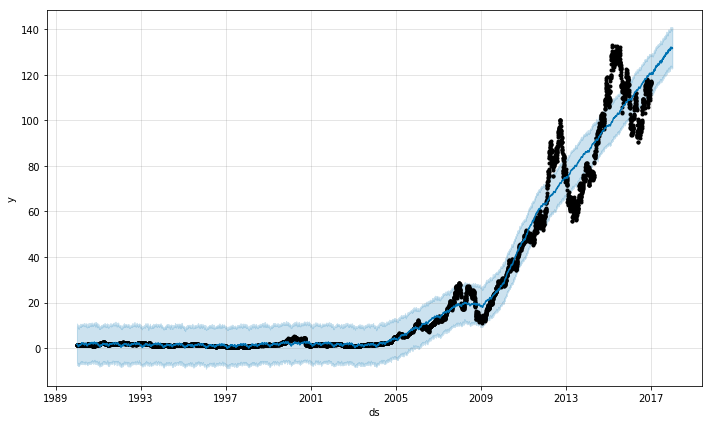

In [13]:
m.plot(forecast)

검은 반점이 원 주가... 파란 실선이 예측값, 엷은 파란색의 범위가 유효 범위입니다.

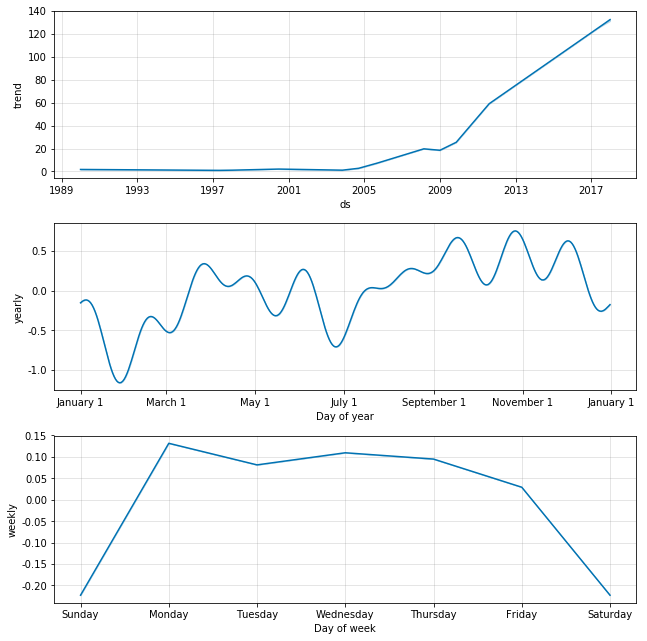

In [14]:
m.plot_components(forecast);

거기에 대한 추가 정보를 줍니다. 일단 trend를 예측 포함해서 알려주구요. weekly나 yearly 정보도 제공합니다.